<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Projects/blob/main/Apple_Stock_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apple is a well known company and Apple stocks, one of the most renowned and influential stocks in the global market, have witnessed significant growth and fluctuations over the years. This project aims to analyze the daily trading activity of Apple stocks from 2015 to February 2024, encompassing a vast dataset. By delving into this comprehensive historical data, our objective is to gain insights into the patterns, trends, and factors influencing Apple stock prices, ultimately developing a predictive model to forecast the daily closing prices. 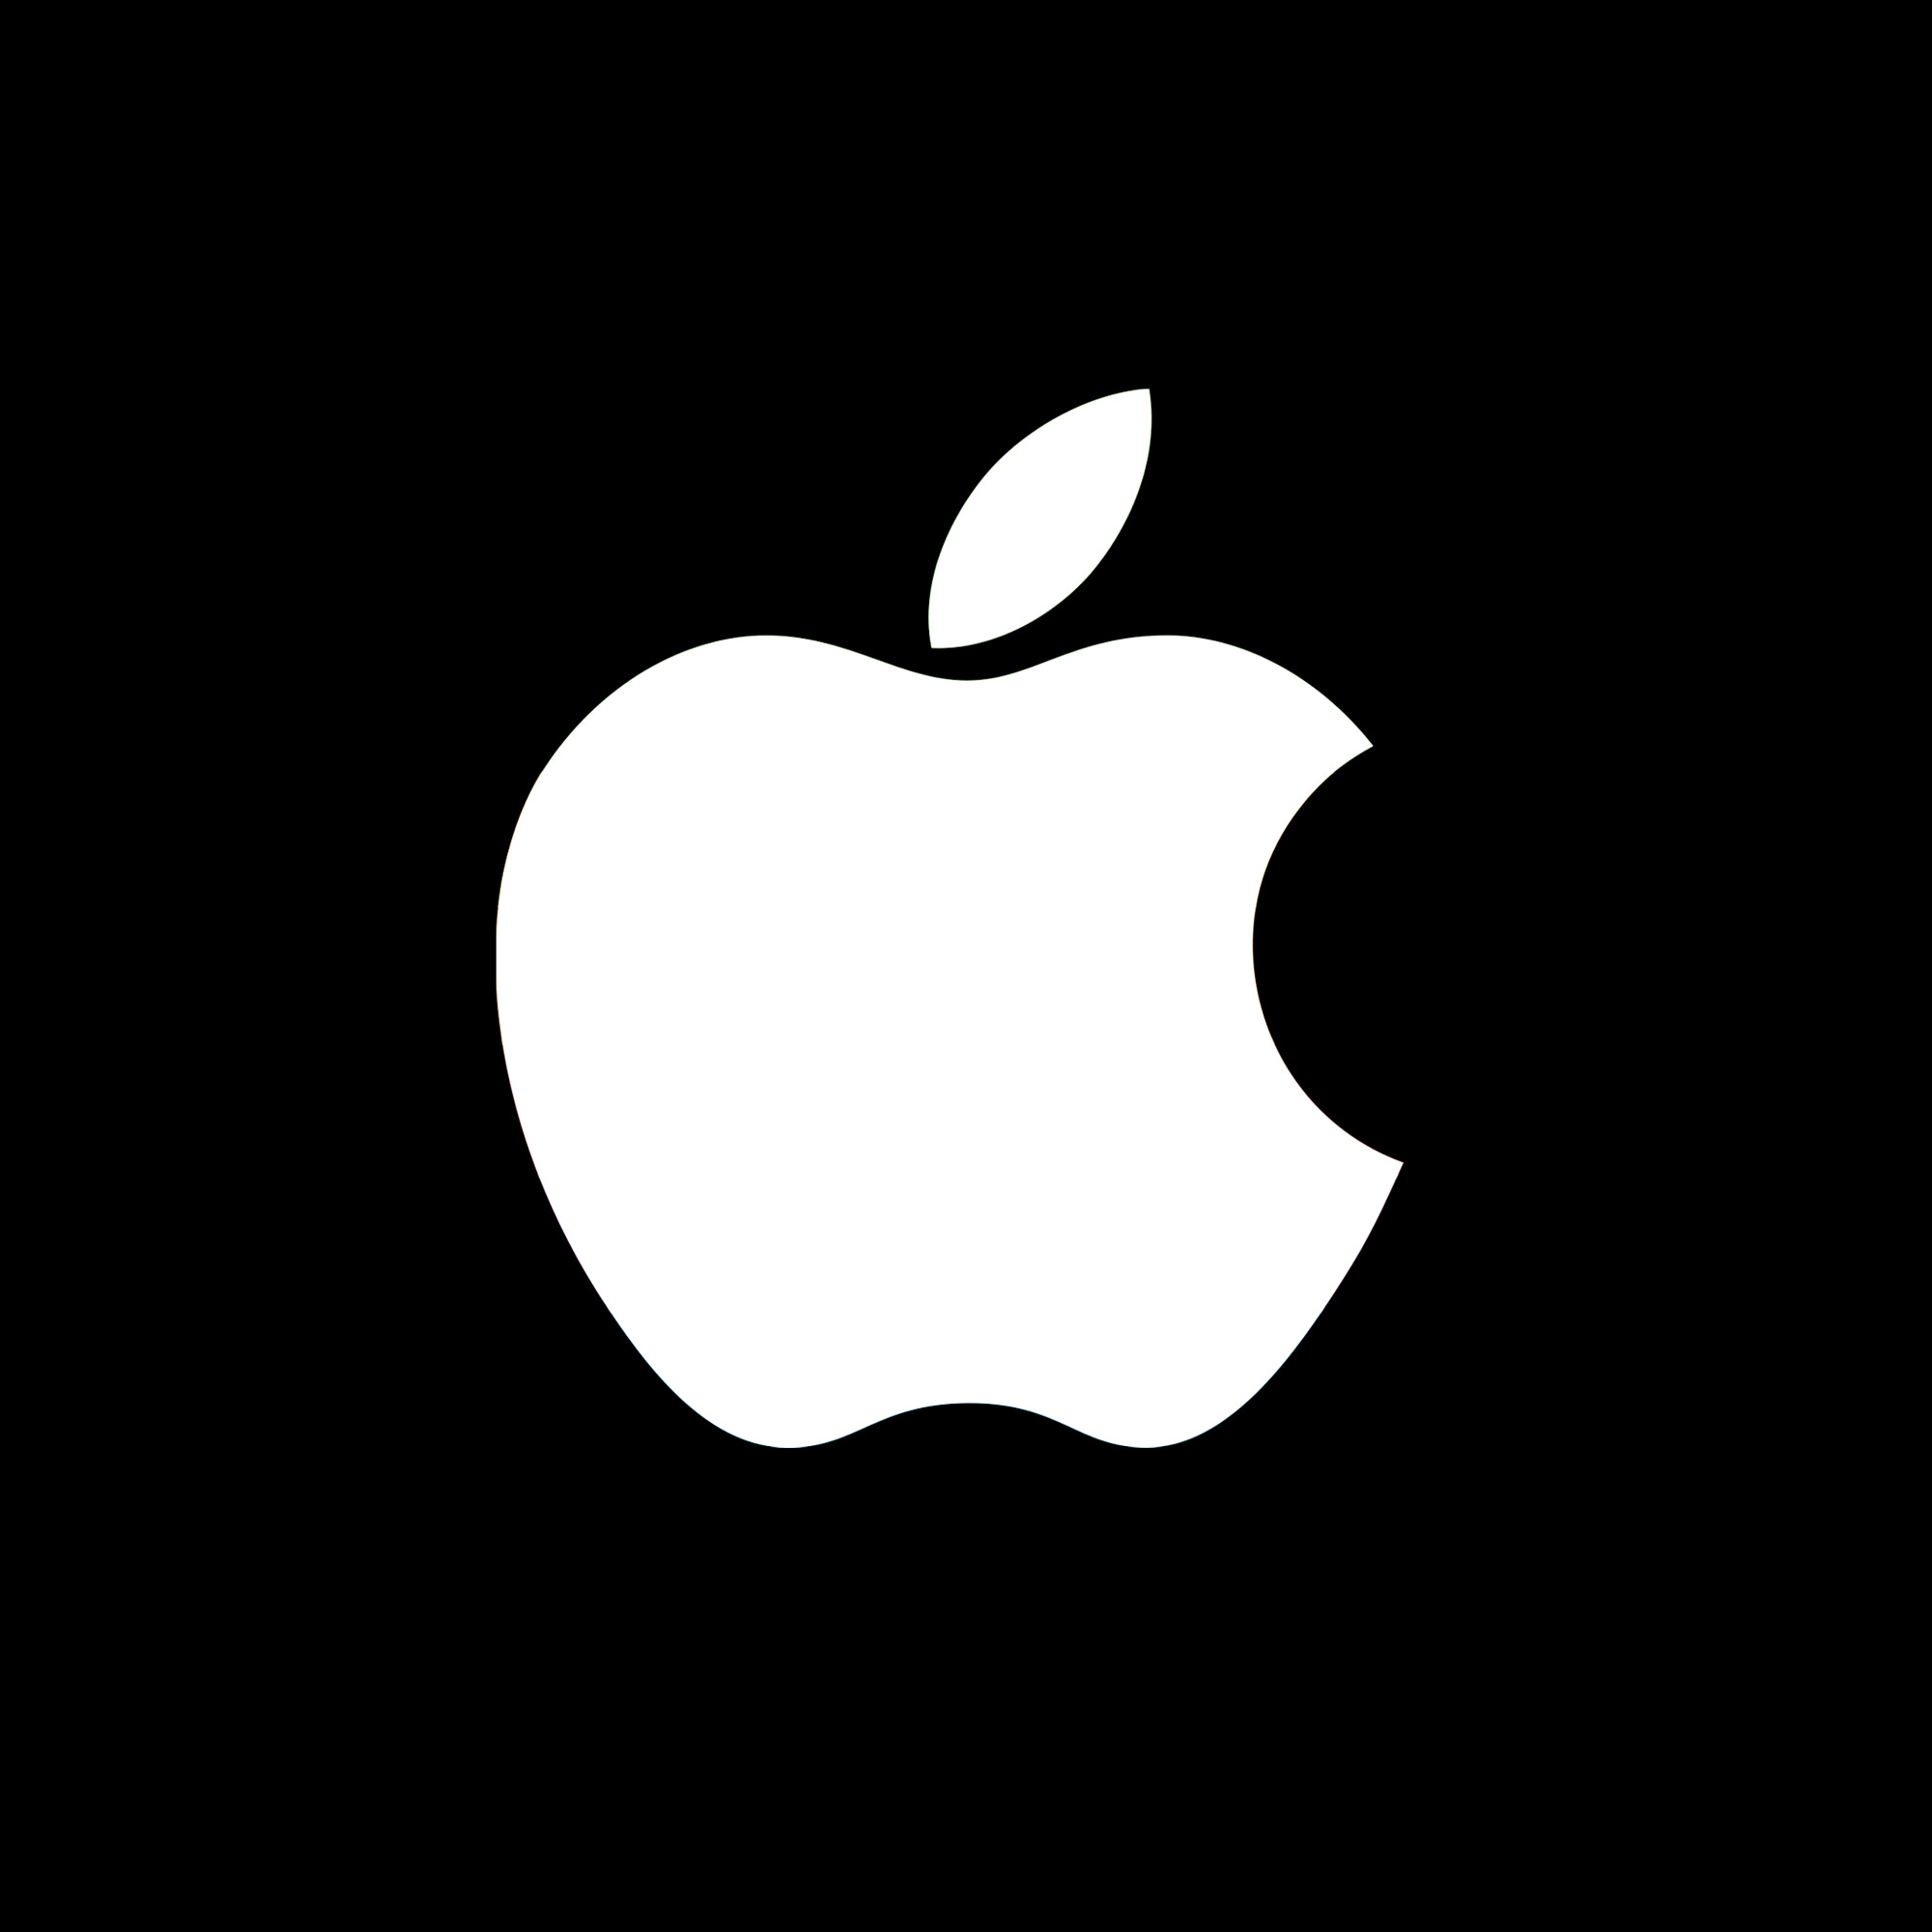

Columns:
The date refers to the specific day on which the trading activity occurred. It serves as a chronological reference point for analyzing the stock market.

The high and low prices represent the highest and lowest trading prices reached during a particular trading day, respectively. These values provide insights into the price range within which the stock fluctuated throughout the day.

The closing price refers to the final trading price of the stock at the end of the trading day. It is an essential indicator for investors as it reflects the market's sentiment and can influence future trading decisions.

Volume represents the total number of shares traded during a given trading day. It provides an indication of the market's interest and activity in a particular stock. Higher volumes often suggest increased liquidity and investor participation.

Change, usually expressed as a percentage, quantifies the difference between the closing price of a stock on a given day and its previous closing price. It reflects the stock's price movement, whether it has increased or decreased, and the magnitude of the change.

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [189]:
apple_stock = pd.read_csv('/content/AAPL Historical Data (1).csv')
print(apple_stock.head())

         Date   Price    Open    High     Low    Vol. Change %
0  12/02/2024  187.15  188.41  188.67  186.79  40.94M   -0.90%
1  09/02/2024  188.85  188.65  189.99  188.00  45.16M    0.28%
2  08/02/2024  188.32  189.38  189.54  187.35  39.27M   -0.58%
3  07/02/2024  189.41  190.64  191.05  188.61  51.40M    0.06%
4  06/02/2024  189.30  186.86  189.31  186.77  43.49M    0.86%


In [190]:
print(apple_stock.tail())

            Date  Price   Open   High    Low     Vol. Change %
2289  08/01/2015  27.97  27.31  28.04  27.18  237.46M    3.82%
2290  07/01/2015  26.94  26.80  27.05  26.67  160.42M    1.39%
2291  06/01/2015  26.57  26.64  26.86  26.16  263.19M    0.04%
2292  05/01/2015  26.56  27.07  27.16  26.35  257.14M   -2.82%
2293  02/01/2015  27.33  27.85  27.86  26.84  212.82M   -0.94%


#Cleaning Dataset

In [191]:
#Checking for missing values

apple_stock.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64

In [192]:
#Dealing with the missing value
apple_stock = apple_stock.dropna()
print(apple_stock.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2293 non-null   object 
 1   Price     2293 non-null   float64
 2   Open      2293 non-null   float64
 3   High      2293 non-null   float64
 4   Low       2293 non-null   float64
 5   Vol.      2293 non-null   object 
 6   Change %  2293 non-null   object 
dtypes: float64(4), object(3)
memory usage: 143.3+ KB
None


In [193]:
#Replace the M in the volume column
apple_stock['Vol.'] = apple_stock['Vol.'].str.replace('M','')
print(apple_stock['Vol.'])

#Remove the Percent change sign in change column
apple_stock['Change %'] = apple_stock['Change %'].str.replace('%','')
print(apple_stock['Change %'])

#Change the name of the column so that the measurement of the volume of stock traded in the day can be known
apple_stock.rename(columns={"Vol.": "Vol(Million)"}, inplace=True)
print(apple_stock.head())

0        40.94
1        45.16
2        39.27
3        51.40
4        43.49
         ...  
2289    237.46
2290    160.42
2291    263.19
2292    257.14
2293    212.82
Name: Vol., Length: 2293, dtype: object
0       -0.90
1        0.28
2       -0.58
3        0.06
4        0.86
        ...  
2289     3.82
2290     1.39
2291     0.04
2292    -2.82
2293    -0.94
Name: Change %, Length: 2293, dtype: object
         Date   Price    Open    High     Low Vol(Million) Change %
0  12/02/2024  187.15  188.41  188.67  186.79        40.94    -0.90
1  09/02/2024  188.85  188.65  189.99  188.00        45.16     0.28
2  08/02/2024  188.32  189.38  189.54  187.35        39.27    -0.58
3  07/02/2024  189.41  190.64  191.05  188.61        51.40     0.06
4  06/02/2024  189.30  186.86  189.31  186.77        43.49     0.86


In [194]:
apple_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2293
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2293 non-null   object 
 1   Price         2293 non-null   float64
 2   Open          2293 non-null   float64
 3   High          2293 non-null   float64
 4   Low           2293 non-null   float64
 5   Vol(Million)  2293 non-null   object 
 6   Change %      2293 non-null   object 
dtypes: float64(4), object(3)
memory usage: 143.3+ KB


In [195]:
#Convert the Date to datetime and Volume and Change to float
apple_stock['Date'] = pd.to_datetime(apple_stock['Date'], format = '%d/%m/%Y')

#Convert the vol and change datatype
apple_stock[['Vol(Million)','Change %']] = apple_stock[['Vol(Million)','Change %']].astype('float')

print(apple_stock.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2293
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2293 non-null   datetime64[ns]
 1   Price         2293 non-null   float64       
 2   Open          2293 non-null   float64       
 3   High          2293 non-null   float64       
 4   Low           2293 non-null   float64       
 5   Vol(Million)  2293 non-null   float64       
 6   Change %      2293 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 143.3 KB
None


In [196]:
#Summary statistics
apple_stock.describe()

,Price,Open,High,Low,Vol(Million),Change %
count,2293.000000,2293.00000,2293.000000,2293.000000,2293.000000,2293.000000
mean,85.338652,85.26495,86.193249,84.393716,122.883589,0.067527
std,56.875416,56.81615,57.445192,56.235649,68.289999,2.406947
min,22.590000,22.50000,22.920000,22.370000,24.040000,-75.070000
25%,35.790000,35.81000,36.010000,35.550000,77.030000,-0.750000
50%,54.580000,54.61000,55.240000,54.160000,105.060000,0.080000
75%,142.940000,143.02000,144.600000,141.160000,147.750000,1.010000
max,198.110000,198.02000,199.620000,197.000000,648.830000,11.970000


Visualization

In [197]:
correlation = apple_stock.corr()
print(correlation)

                 Price      Open      High       Low  Vol(Million)  Change %
Price         1.000000  0.999657  0.999836  0.999842     -0.481577  0.024134
Open          0.999657  1.000000  0.999860  0.999836     -0.480733  0.011004
High          0.999836  0.999860  1.000000  0.999796     -0.477345  0.016328
Low           0.999842  0.999836  0.999796  1.000000     -0.485243  0.017333
Vol(Million) -0.481577 -0.480733 -0.477345 -0.485243      1.000000 -0.055101
Change %      0.024134  0.011004  0.016328  0.017333     -0.055101  1.000000


<ipython-input-197-a78e196c13de>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [198]:
# Creating the correlation plot using plotly
fig = px.imshow(correlation, color_continuous_scale='Viridis',title='Correlation between the variables')

# Display the plot
fig.show()

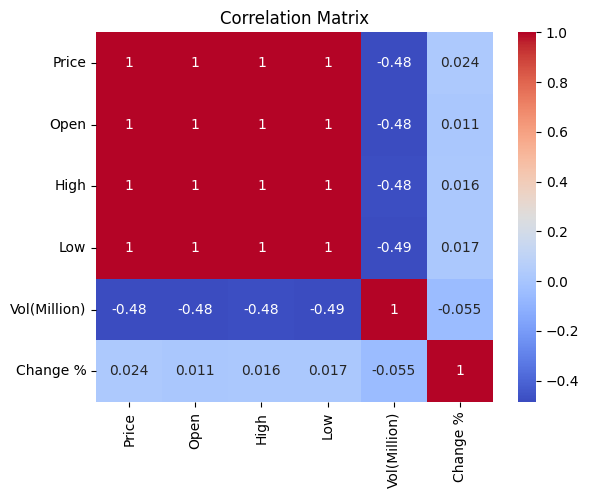

In [199]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Line plots

In [200]:
#Relationship between highest and lowest price by the closing price
fig = px.scatter(apple_stock, x="High", y="Low", color='Price',title='Relationship between Highest and Lowest Trading Price by the Closing Price')
fig.show()

In [201]:
fig = px.scatter(apple_stock, x="Open", y="Price",title ='Opening Price Vs Closing Price')
fig.show()

In [202]:
fig = px.scatter(apple_stock, x="High", y="Price")
fig.show()

In [203]:
fig = px.scatter(apple_stock, x="Date", y="Price", title ='Relationship between the Closing Price and Dates')
fig.show()

In [204]:
fig = px.scatter(apple_stock, x="Date", y="Open",color="Price", title = 'Daily Opening Price by Closing Price')
fig.show()

In [205]:
fig = px.scatter(apple_stock, x="Date", y="Low",color="Price",title='Lowest Trading price per day over the years')
fig.show()

In [206]:
fig = px.scatter(apple_stock, x="Date", y="Vol(Million)",color="Price",title='Scatterplot showing the distribution of the volume of stocks traded over time')
fig.show()

In [207]:
fig = px.bar(apple_stock, x="Date", y="Vol(Million)",color="Price",title='Volume of Stocks Traded per day over Time')
fig.show()

In [208]:
fig = px.bar(apple_stock, x='Date', y='Price', color_continuous_scale='Blues',title="Relationship between the Date per closing Price")
fig.show()

In [209]:
fig = px.scatter(apple_stock, x='Date', y='Price',title = 'Scatterplot showing the Closing Price by the Date')
fig.show()

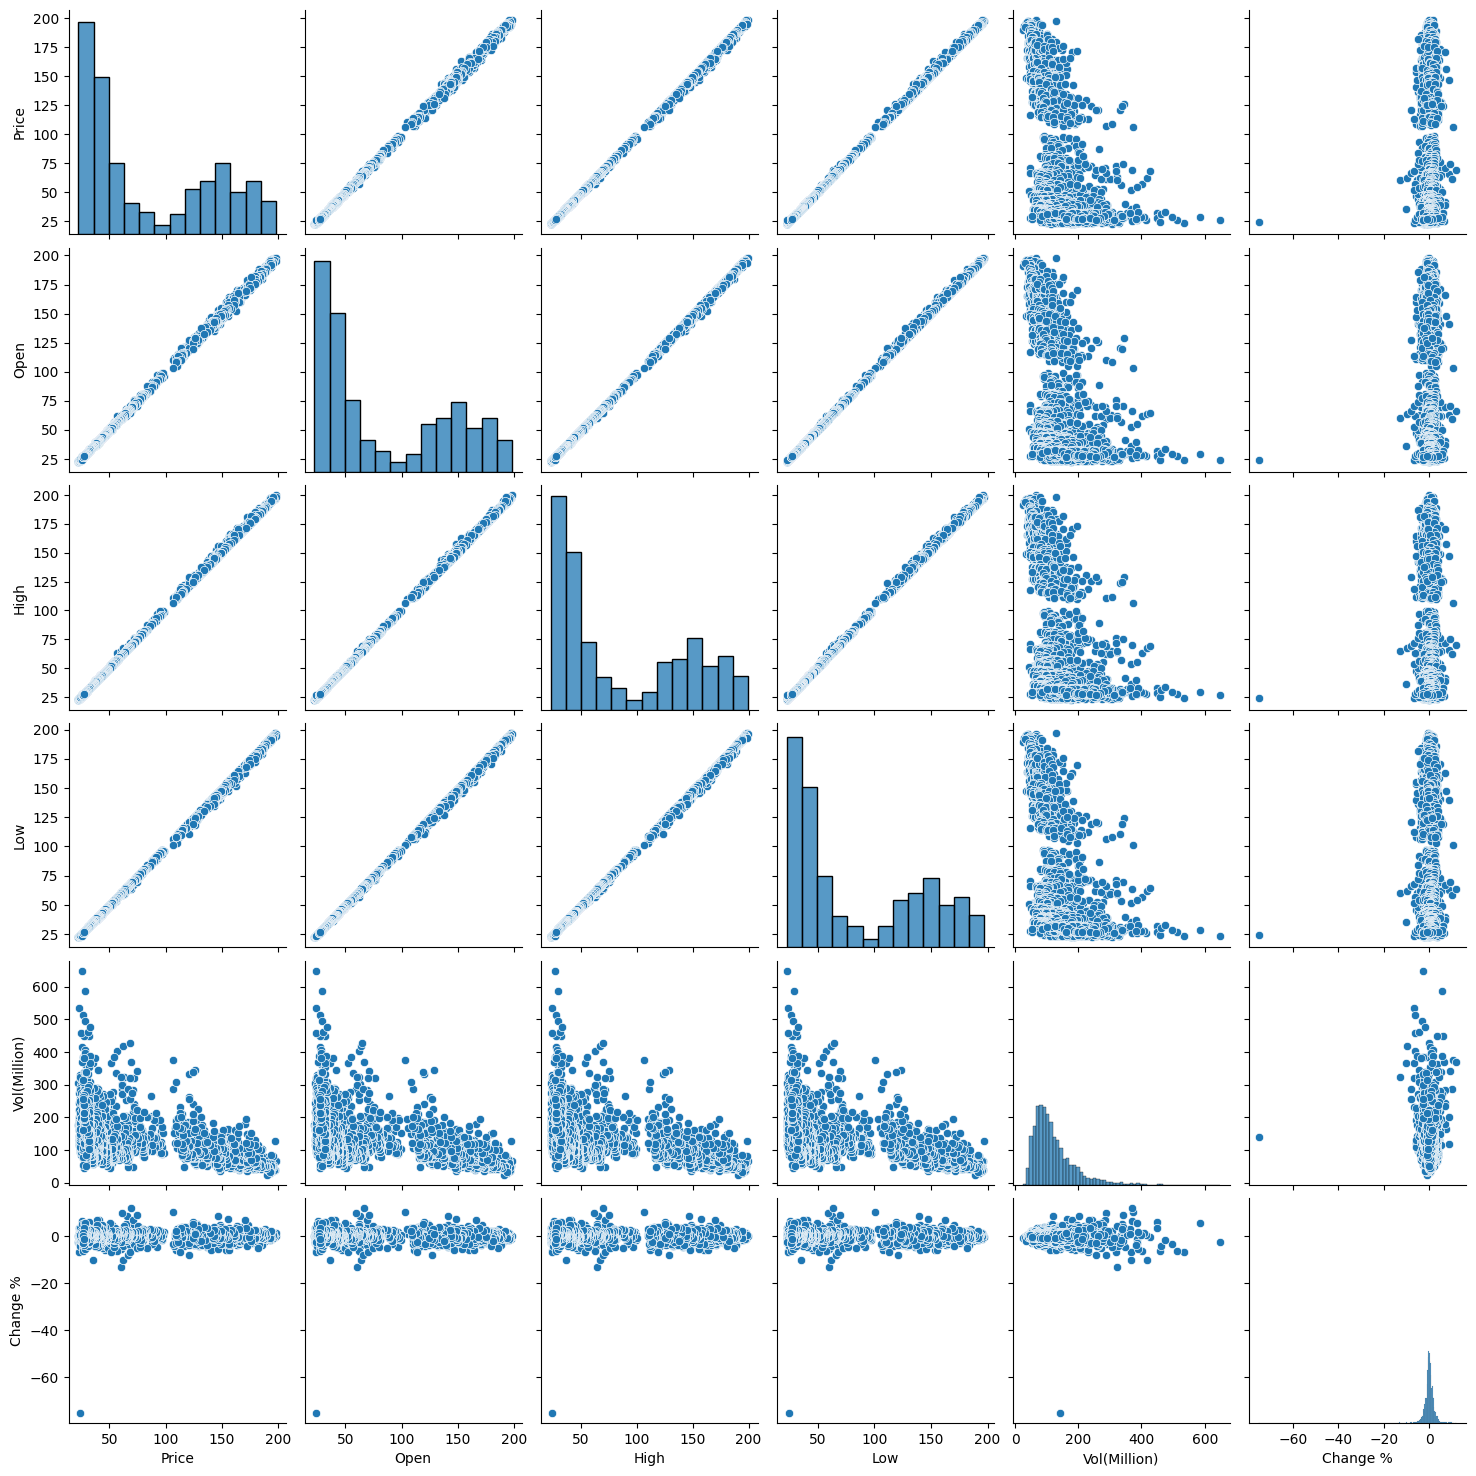

In [210]:
sns.pairplot(apple_stock)
plt.show()

## Predicting the Closing Prices using Regression (Linear Regression)

In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [212]:
X = apple_stock.drop(['Price','Date'], axis=1).values
y = apple_stock['Price']

In [213]:
#Linear Regression
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

model = LinearRegression()
#Fit my training data into the model
model.fit(X_train,y_train)
#Prediction
predict = model.predict(X_test)
print(predict)

[ 26.68757803  29.82851132  45.94316625  27.47620099  48.15071762
 189.06526229  27.58981851 143.92069651 194.68236794  29.89272594
  75.52009499  38.45082168 168.38075106 149.6868006   32.98670603
  61.85250907  27.23036796  27.3183019   46.89231882  28.60355238
  40.33604023  28.64000454  53.84787519  44.02135034 129.49844373
  54.08181111  59.19154834  28.24708093  42.83533617 146.20229688
 153.58620098  43.54262993  27.13519988 159.48991177  71.06191838
 192.61484278 167.11762841  28.38004735  57.56769904  30.85753616
  32.1910061  178.81862229  32.56271142 152.72092264  48.46026689
  29.04314604  30.98123105  27.31873533 138.677453    47.66443391
  69.48011572  45.54744748 132.65519935  46.59367586 126.91702976
 147.86234545  52.426501    47.04184212  81.07009637 155.14769641
  26.94346177  37.16817213  70.78080682  40.14548017 156.48464717
 158.03057608  45.87450417 151.81668368  44.76017484 155.71005259
  72.74154357 109.92109651  32.11661336 130.24014444 165.14279116
  24.12382

Visualizing the actual Price verses Predicted prices

Text(0.5, 1.0, 'Relationship between the Original Prices and Predictions')

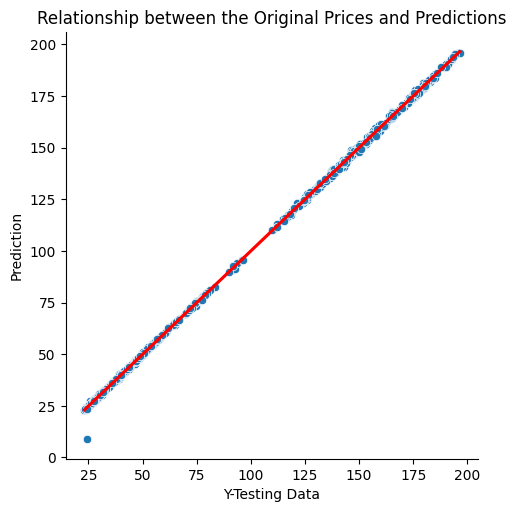

In [214]:
sns.relplot(x=y_test, y=predict, kind='scatter')
sns.regplot(x=y_test, y=predict, scatter=False, color='r')
plt.xlabel('Y-Testing Data')
plt.ylabel('Prediction')
plt.title('Relationship between the Original Prices and Predictions')

Evaluating the model

In [215]:
#R-squared
r_squared = model.score(X_test,y_test)
print('The R_squared Metrics is:',r_squared)

The R_squared Metrics is: 0.9997948232772812


This means that features explains about 99% of the final Closing trading Price in a day

In [216]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,predict)
print('The Mean squared Error:', mse)

The Mean squared Error: 0.6724372657107924


In [217]:
#Root mean squared error
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test,predict,squared=False)
print('The Root Mean squared Error:', rmse)

The Root Mean squared Error: 0.8200227226795562


This means that the model has an average error of about 82 dollars for the closing Price per day

## Cross Validation

In [218]:
from sklearn.model_selection import cross_val_score,KFold

kf = KFold(n_splits = 5, shuffle=True,random_state=5)
model = LinearRegression()
cv_results = cross_val_score(model,X,y,cv=kf)
print(cv_results)

# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

[0.99984477 0.99973562 0.99989525 0.99989027 0.99990955]
0.9998550922437346
6.355363426724126e-05
[0.99974654 0.99990812]


## Regularization using Ridge and Lasso

### Ridge Regression

In [219]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1,1.0,10.0,100.0,1000.0]:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train,y_train)
  prediction = ridge.predict(X_test)
  scores.append(ridge.score(X_test,y_test))
print(scores)

#Metrics Evaluation
#R-squared
r_squared = ridge.score(X_test,y_test)
print('The R_squared Metrics is:',r_squared)
mse = mean_squared_error(y_test,prediction)
print('The Mean squared Error:', mse)
rmse = mean_squared_error(y_test,prediction,squared=False)
print('The Root Mean squared Error:', rmse)

[0.9997947897391187, 0.999794488226622, 0.9997915061893246, 0.9997651002556782, 0.999684663747969]
The R_squared Metrics is: 0.999684663747969
The Mean squared Error: 1.0334693150635377
The Root Mean squared Error: 1.016596928513724


The best alpha is the first one - 0.1

# Lasso Regression

In [220]:
from sklearn.linear_model import Lasso
scores =[]
for alpha in [0.01,1.0,10.0,20.0,50.0,100.0,1000.0]:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train,y_train)
  lasso_pred = lasso.predict(X_test)
  scores.append(lasso.score(X_test,y_test))
print(scores)

[0.9990725141709411, 0.999496308887804, 0.9994323529847399, 0.999418838034118, 0.9992690387870115, 0.998627883960541, 0.9048771861508114]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.068e+02, tolerance: 5.159e+02

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.997e+02, tolerance: 5.159e+02

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.639e+02, tolerance: 5.159e+02

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

Lasso regression for feature Selection

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.489e+03, tolerance: 7.414e+02



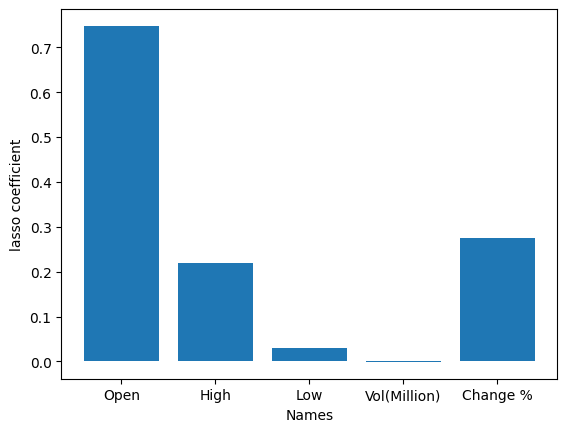

In [221]:
X = apple_stock.drop(['Price','Date'],axis=1).values
y= apple_stock['Price'].values
names =apple_stock.drop(['Price','Date'],axis=1).columns
lasso = Lasso(alpha=0.01)
lasso_coefficient = lasso.fit(X,y).coef_

#Visulaization
plt.bar(names,lasso_coefficient)
plt.xlabel('Names')
plt.ylabel('lasso coefficient')
plt.show()

From this barplot, the most important predictor for the predicting Closing price is the Opening Price.